In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Load the training and validation datasets
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Normalize the pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)
training_set = training_set.map(lambda x, y: (normalization_layer(x), y))
validation_set = validation_set.map(lambda x, y: (normalization_layer(x), y))
# Load EfficientNetB0 with pretrained weights
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Allow fine-tuning
base_model.trainable = True

# Add custom layers on top of EfficientNetB0
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Adjust to your number of classes
])

# Compile the model with a smaller learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Reduced learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=30  # You can adjust this based on your observation of overfitting/underfitting
)

# Evaluate the model
train_loss, train_acc = model.evaluate(training_set)
val_loss, val_acc = model.evaluate(validation_set)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

Found 19484 files belonging to 10 classes.
Found 3446 files belonging to 10 classes.
Epoch 1/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 1204s 2s/step - accuracy: 0.1373 - loss: 2.4950 - val_accuracy: 0.1393 - val_loss: 2.2899
Epoch 2/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 1145s 2s/step - accuracy: 0.3301 - loss: 1.9405 - val_accuracy: 0.6698 - val_loss: 1.3193
Epoch 3/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 1086s 2s/step - accuracy: 0.5305 - loss: 1.4408 - val_accuracy: 0.6701 - val_loss: 1.2499
Epoch 4/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 1024s 2s/step - accuracy: 0.6665 - loss: 1.0547 - val_accuracy: 0.7905 - val_loss: 0.7581
Epoch 5/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 1020s 2s/step - accuracy: 0.7494 - loss: 0.7791 - val_accuracy: 0.8314 - val_loss: 0.6088
Epoch 6/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 1024s 2s/step - accuracy: 0.8103 - loss: 0.5974 - val_accuracy: 0.8314 - val_loss: 0.5379
Epoch 7/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 1024s 2s/step - accuracy: 0.8494 - loss: 0.4824 - val_accuracy: 0.8912 - val_loss: 0.3374
Epoch

In [3]:
model.save('efficientnet_plant_disease_model12.keras')

In [4]:
# Evaluate the model on the training set'
train_loss, train_acc = model.evaluate(training_set)
print(f'Training Accuracy: {train_acc * 100:.2f}%')

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_set)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')


609/609 ━━━━━━━━━━━━━━━━━━━━ 155s 252ms/step - accuracy: 0.9976 - loss: 0.0087
Training Accuracy: 99.73%
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 264ms/step - accuracy: 0.9785 - loss: 0.0720
Validation Accuracy: 97.82%


In [5]:
# Access the training history
training_history = history.history

# Display the history dictionary
print(training_history)


{'accuracy': [0.17516936361789703, 0.3648121654987335, 0.5360808968544006, 0.6708068251609802, 0.7540032863616943, 0.8090741038322449, 0.8450523614883423, 0.8687641024589539, 0.8919113278388977, 0.9050502777099609, 0.9176760315895081, 0.9273250102996826, 0.933740496635437, 0.942465603351593, 0.9475980401039124, 0.9562205076217651, 0.9545781016349792, 0.9596078991889954, 0.9653048515319824, 0.9658694267272949, 0.9714637398719788, 0.973824679851532, 0.9733627438545227, 0.975980281829834, 0.978238582611084, 0.9793163537979126, 0.9809587597846985, 0.9805481433868408, 0.983935534954071, 0.98470538854599], 'loss': [2.349231481552124, 1.8466750383377075, 1.4140527248382568, 1.0514426231384277, 0.7919180989265442, 0.612413763999939, 0.4935448467731476, 0.4190223515033722, 0.3433614671230316, 0.30394893884658813, 0.25887829065322876, 0.229217529296875, 0.20378895103931427, 0.1749807894229889, 0.16828258335590363, 0.1389973759651184, 0.1389632523059845, 0.12444136291742325, 0.1083545833826065, 0

In [6]:

 # Import the json module
import json

# Save the training history to a JSON file
with open('training_hist.json', 'w') as f:
    json.dump(training_history, f)

print("Training history has been saved to 'training_hist.json'")


Training history has been saved to 'training_hist.json'


In [7]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


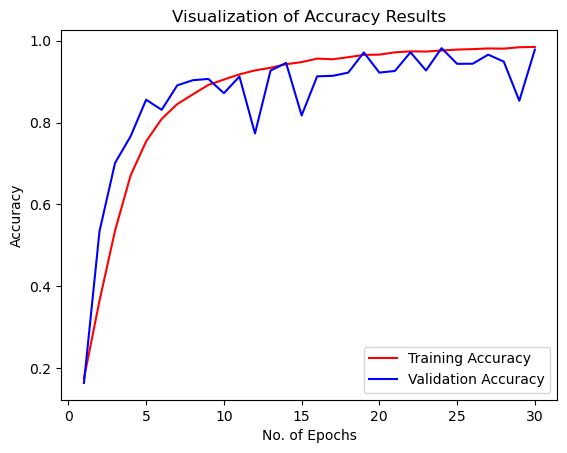

In [8]:
import matplotlib.pyplot as plt

# Generate the list of epochs
epochs = [i for i in range(1, len(history.history['accuracy']) + 1)]

# Plot training accuracy
plt.plot(epochs, history.history['accuracy'], color='red', label='Training Accuracy')

# Plot validation accuracy
plt.plot(epochs, history.history['val_accuracy'], color='blue', label='Validation Accuracy')

# Add labels, title, and legend
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Results')
plt.legend()

# Show the plot
plt.show()


Found 3446 files belonging to 10 classes.
Generating predictions on the test set...
3446/3446 ━━━━━━━━━━━━━━━━━━━━ 59s 15ms/step
True Labels:  [0 0 0 ... 9 9 9]
Predicted Labels:  [0 0 0 ... 9 9 9]
Confusion Matrix:
 [[315   0   0   0   0   0   0   0   0   0]
 [  5 350   8   0   1   2   2   0   0   0]
 [  0   2 343   0   1   0   0   0   0   1]
 [  1   0   3 342   5   2   0   1   0   0]
 [  2   2   0   0 323   1   0   0   0   0]
 [  0   0   1   0   0 323   1   2   0   0]
 [  2   3   1   0   2  14 319   0   0   3]
 [  1   0   0   0   0   0   0 365   0   0]
 [  0   1   0   0   1   1   0   0 333   0]
 [  0   0   1   0   0   1   1   0   0 358]]
Classification Report:

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.97      1.00      0.98       315
                        Tomato___Early_blight       0.98      0.95      0.96       368
                         Tomato___Late_blight       0.96      0.99

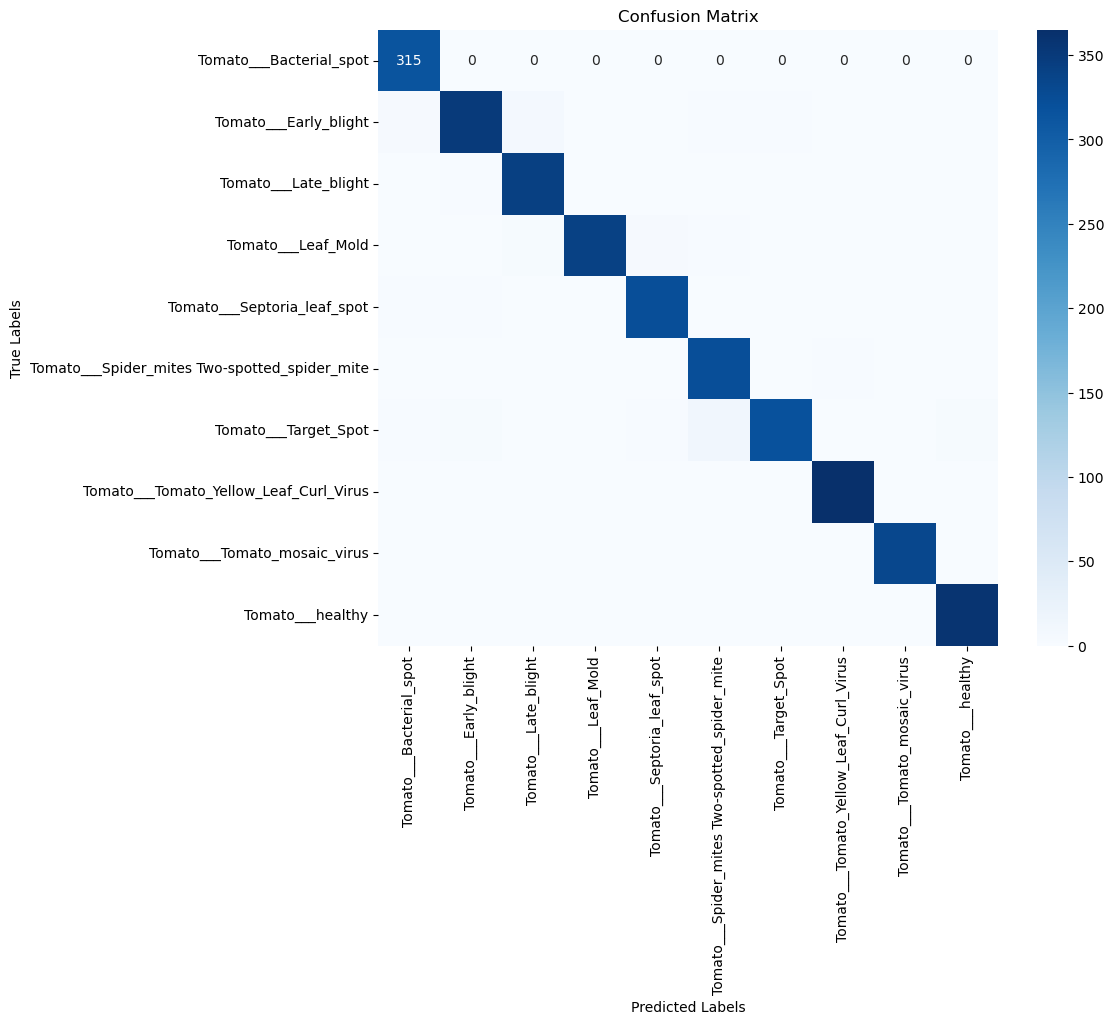

In [9]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the validation set to access class names
raw_validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    batch_size=1,  # Batch size 1 for individual predictions
    image_size=(128, 128),
    shuffle=False  # Ensure consistent order for predictions
)

# Extract class names
class_names = raw_validation_set.class_names

# Normalize the test set (same normalization as the training set)
normalization_layer = tf.keras.layers.Rescaling(1./255)
test_set = raw_validation_set.map(lambda x, y: (normalization_layer(x), y))

# Predict on the test set
print("Generating predictions on the test set...")
y_pred = model.predict(test_set)
predicted_categories = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Extract true labels from the test set
true_categories = tf.concat([y for _, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1).numpy()  # Convert one-hot to class indices

# Display true and predicted labels
print("True Labels: ", Y_true)
print("Predicted Labels: ", predicted_categories)

# Compute and display the confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)
print("Confusion Matrix:\n", cm)

# Display classification metrics
print("Classification Report:\n")
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


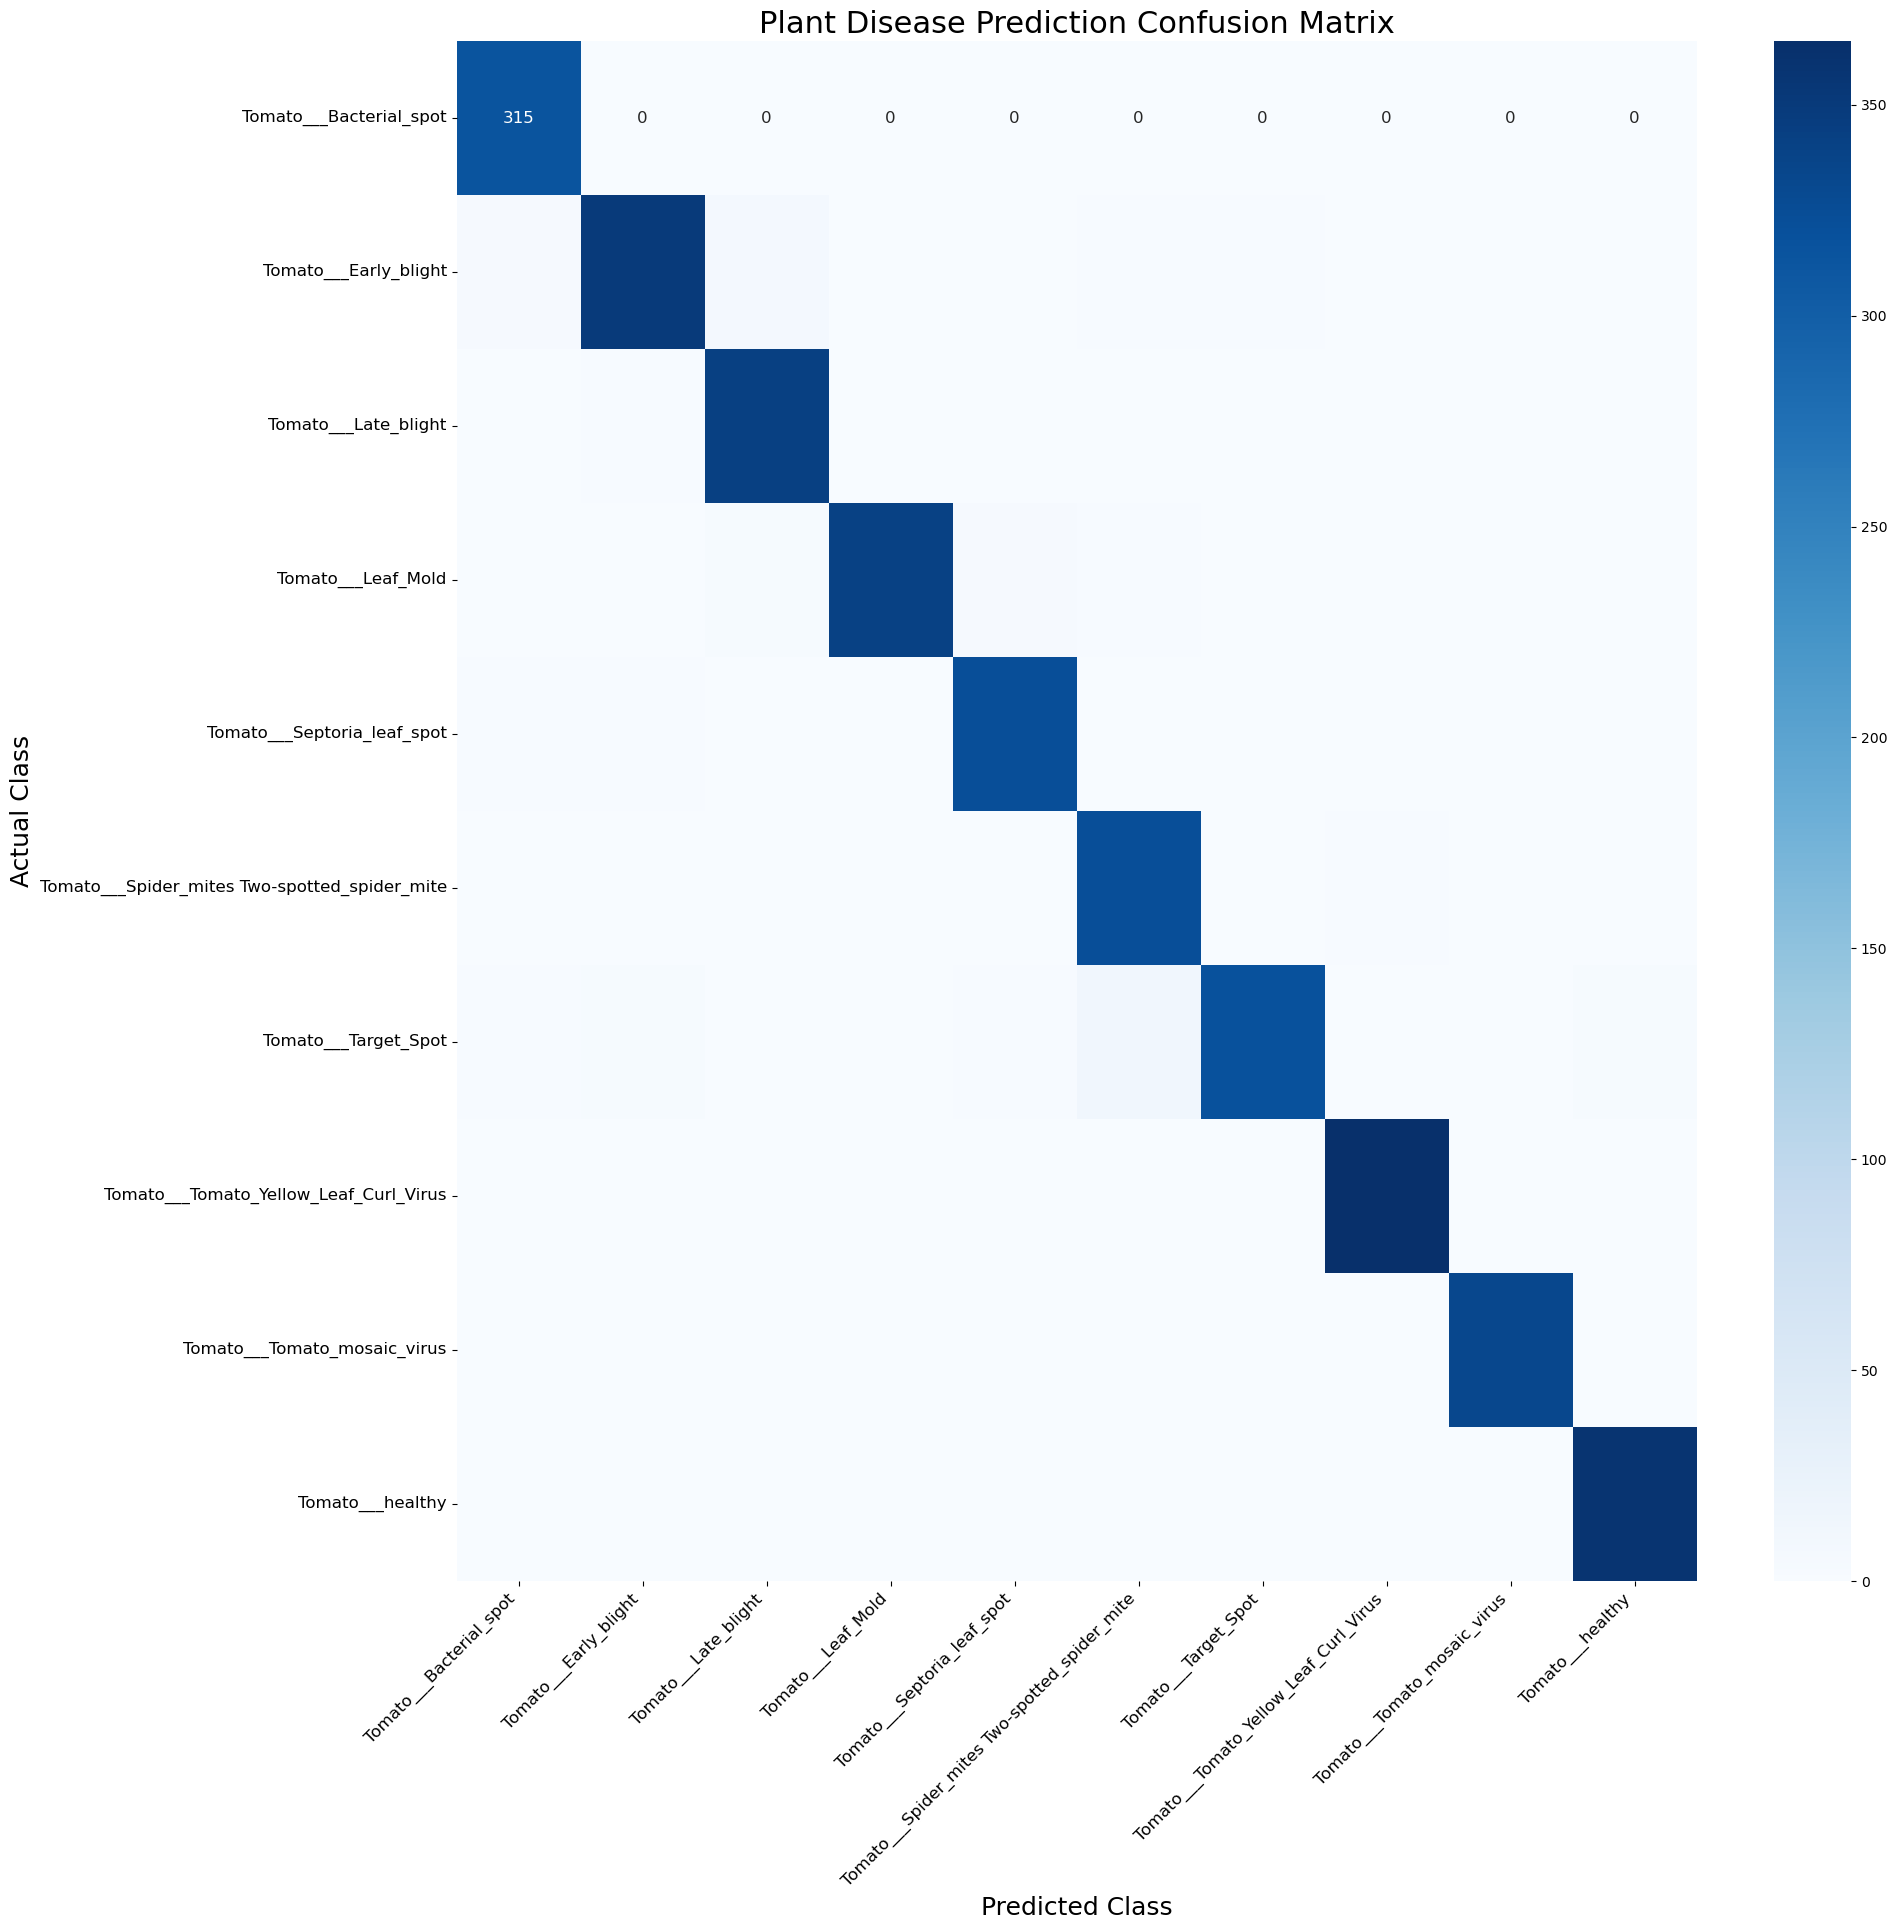

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(20, 20))  # Reduced size for better scaling, adjust as needed
sns.heatmap(
    cm,

    annot=True,  # Annotate cells with values
    fmt="d",  # Integer formatting for cell values
    cmap="Blues",  # Color map
    annot_kws={"size": 12}  # Font size for annotations
)
# Add labels and title
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('Actual Class', fontsize=18)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=22)

# Set tick labels
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, fontsize=12, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, fontsize=12, rotation=0)

# Display the plot
plt.show()
